In [9]:
#Dependencies
import tweepy
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
import seaborn as sns
from config import consumer_key, consumer_secret, access_token, access_token_secret

#Start Vader Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
#API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [34]:
#Create list of targets
target_terms = ("@CNN", "@BBC", "@CBS", "@FoxNews", "@nytimes")

# "Real Person" Filters
min_tweets = 5
max_tweets = 10000
max_followers = 2500
max_following = 2500
lang = "en"

#Results holder
results_list = []


#Loop through target terms
for target in target_terms:
    
    #Hold oldest tweet
    oldest_tweet = None
    
    counter = 0
    
    #Sentiment Variables
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    
#     #Loop through the 100 most recent tweets
#     for x in range(100):
        
    #Run search through tweets
    public_tweets = api.search(target, count=100, result_type="recent", max_id=oldest_tweet)

    #Loop through all tweets
    for tweet in public_tweets["statuses"]:

        #Use filters to make sure tweets are from a real person
        if (tweet["user"]["followers_count"] < max_followers
            and tweet["user"]["statuses_count"] > min_tweets
            and tweet["user"]["statuses_count"] < max_tweets
            and tweet["user"]["friends_count"] < max_following
            and tweet["user"]["lang"] == lang):

            #Run vader analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            date = tweet["created_at"]

            #Add the values to our earlier lists
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)

        # Set the new oldest_tweet value
        oldest_tweet = tweet["id"] - 1

        counter += 1

    # Store the Average Sentiments
    sentiment = {
        "News Source": target,
        "Timestamp": date,
        "Compound": np.mean(compound_list),
        "Positive": np.mean(positive_list),
        "Neutral": np.mean(negative_list),
        "Negative": np.mean(neutral_list),
        "Tweet Count": len(compound_list)
    }


#         #Print the sentiments
#         print(sentiment)
#         print()

    #Add to the results_list
    results_list.append(sentiment)

print("Complete!")

RateLimitError: [{'message': 'Rate limit exceeded', 'code': 88}]

In [28]:
print(counter)

500


In [32]:
#Create a datafram
news_df = pd.DataFrame(results_list)
news_df

,Compound,Negative,Neutral,News Source,Positive,Timestamp,Tweet Count
0,-0.059740,0.806314,0.099543,@CNN,0.094086,Tue Jun 26 04:42:30 +0000 2018,35
1,-0.026382,0.827096,0.089855,@CNN,0.083012,Tue Jun 26 04:41:02 +0000 2018,83
2,-0.019992,0.830237,0.087619,@CNN,0.082119,Tue Jun 26 04:39:50 +0000 2018,118
3,-0.013050,0.829298,0.085173,@CNN,0.085494,Tue Jun 26 04:38:28 +0000 2018,168
4,0.012275,0.851643,0.070018,@CNN,0.078313,Tue Jun 26 04:37:17 +0000 2018,227
5,0.172618,0.829412,0.063029,@BBC,0.107588,Tue Jun 26 03:55:23 +0000 2018,34
6,0.165361,0.854281,0.049421,@BBC,0.096316,Tue Jun 26 03:19:23 +0000 2018,57
7,0.086083,0.876364,0.051000,@BBC,0.072636,Tue Jun 26 02:38:52 +0000 2018,88
8,0.061181,0.875017,0.054605,@BBC,0.070378,Tue Jun 26 01:55:47 +0000 2018,119
9,0.055968,0.877915,0.053394,@BBC,0.068690,Tue Jun 26 00:58:38 +0000 2018,142


In [31]:
#Export the dataframe to a csv file
news_df.to_csv("News_Mood.csv")

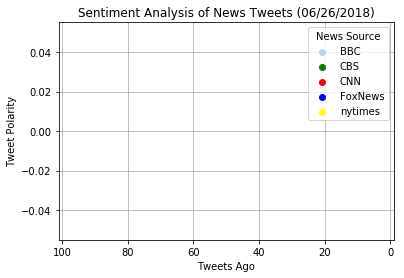

In [24]:
#Create Scatter plot

#set the colors
colors ={"BBC": "lightblue",
             "CBS":"green", 
             "CNN":"red",
             "FoxNews":"blue",
             "nytimes": "yellow"}

# Set the x limit,
plt.xlim(101, -1)

#plot scatterplot using a for loop.
for target in colors:
    df = news_df.loc[news_df["News Source"] == target]
    plt.scatter(df["Tweet Count"],df["Compound"],label = target, color = colors[target])
    
#Add legend
plt.legend(bbox_to_anchor = (1,1), title = "News Source")

#Add title, x axis label, and y axis label.
plt.title("Sentiment Analysis of News Tweets (%s)" %(time.strftime("%m/%d/%Y")))
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

#Set a grid on the plot.
plt.grid()

# plt.savefig("Sentiment Analysis of Media Tweets")
plt.show()